<a href="https://colab.research.google.com/github/yardenzaki/Titanic-EDA-and-ML-SKlearn/blob/main/Titanic_full_EDA_%26_ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

**In this notebook i'll practice a whole DS task including:**

---



1.   Exploratory Data Analysis (EDA)
2.   Data Preparation
3.   Handling Categorical Features
4. Feature Scaling
5. Handling Missing Values
6. Classical ML with Sklearn

👀 Useful Colab notebooks:


*    [Data Analysis & Manipulation with Pandas.ipynb](https://colab.research.google.com/github/Nyandwi/machine_learning_complete/blob/main/2_data_manipulation_with_pandas/2_data_manipulation_with_pandas.ipynb)
*   [Data Visualizations with Matplotlib](https://colab.research.google.com/github/Nyandwi/machine_learning_complete/blob/main/3_data_visualization/1_data_visualizations_with_matplotlib.ipynb#scrollTo=0lavcnp6rKTe)
* [Data Visualization with Seaborn](https://colab.research.google.com/github/Nyandwi/machine_learning_complete/blob/main/3_data_visualization/2_data_visualization_with_seaborn.ipynb#scrollTo=6Kmse2vPRh9q)
* [Exploratory Data Analysis (EDA)](https://colab.research.google.com/github/Nyandwi/machine_learning_complete/blob/main/4_real_world_data_analysis_and_preparation/1_exploratory_data_analysis.ipynb#scrollTo=1a5StKeSfpXc)
* [Comprehensive data exploration with Python (Kaggle) ](https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python/notebook)
* [Feature Scaling](https://colab.research.google.com/github/Nyandwi/machine_learning_complete/blob/main/4_real_world_data_analysis_and_preparation/4_feature_scaling.ipynb)





# Import  libraries:

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler




In [143]:
#set default theme:
sns.set_theme(style="darkgrid")
#set display.max_columns
pd.set_option('display.max_columns', 15)

# **1.0**  Exploratory Data Analysis (EDA)

##  import dataset

In [144]:
titanic = sns.load_dataset('titanic')
# fmri = sns.load_dataset('fmri')
# tips = sns.load_dataset('tips')
# flights = sns.load_dataset('flights')

## Basic Data analysis

In [145]:
#preview
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [146]:
#print information
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Encoding object (Categorical) data with OrdinalEncoder

In [147]:
cats_feats = titanic[['alive', 'alone',"sex","adult_male","embark_town","deck","who","class"]]

encoder = OrdinalEncoder()

cats_encoded = encoder.fit_transform(cats_feats)

titanic_objects = titanic.copy()

# Shot titanic after encoding objects:
titanic[['alive', 'alone',"sex","adult_male","embark_town","deck","who","class"]] = pd.DataFrame(cats_encoded, columns=cats_feats.columns, index=cats_feats.index)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1.0,22.0,1,0,7.2500,S,2.0,1.0,1.0,NaN,2.0,0.0,0.0
1,1,1,0.0,38.0,1,0,71.2833,C,0.0,2.0,0.0,2.0,0.0,1.0,0.0
2,1,3,0.0,26.0,0,0,7.9250,S,2.0,2.0,0.0,NaN,2.0,1.0,1.0
3,1,1,0.0,35.0,1,0,53.1000,S,0.0,2.0,0.0,2.0,2.0,1.0,0.0
4,0,3,1.0,35.0,0,0,8.0500,S,2.0,1.0,1.0,NaN,2.0,0.0,1.0


In [148]:
# encoder.categories_
encoder.categories_

[array(['no', 'yes'], dtype=object),
 array([False,  True]),
 array(['female', 'male'], dtype=object),
 array([False,  True]),
 array(['Cherbourg', 'Queenstown', 'Southampton', nan], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', nan], dtype=object),
 array(['child', 'man', 'woman'], dtype=object),
 array(['First', 'Second', 'Third'], dtype=object)]

In [149]:
#statistics
titanic.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
sex,891.0,0.647587,0.477990,0.00,0.0000,1.0000,1.0,1.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
class,891.0,1.308642,0.836071,0.00,1.0000,2.0000,2.0,2.0000
who,891.0,1.210999,0.594291,0.00,1.0000,1.0000,2.0,2.0000
adult_male,891.0,0.602694,0.489615,0.00,0.0000,1.0000,1.0,1.0000


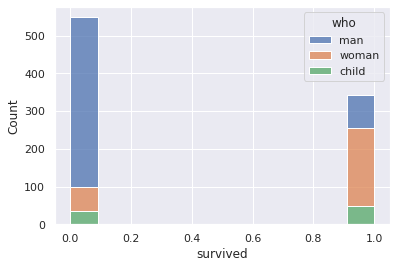

In [200]:
sns.histplot(data=titanic_objects, x='survived', hue='who',multiple="stack")

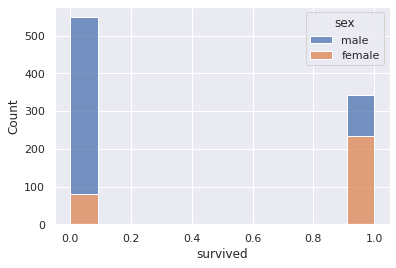

In [201]:
sns.histplot(data=titanic_objects, x='survived', hue='sex',multiple="stack")

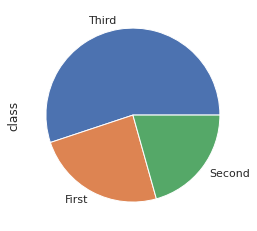

In [151]:
titanic_objects["class"].value_counts().plot(kind='pie')

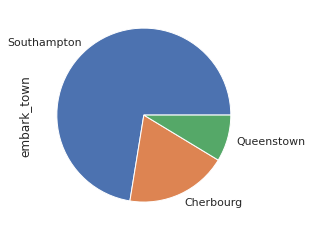

In [152]:
titanic_objects.embark_town.value_counts().plot(kind='pie')

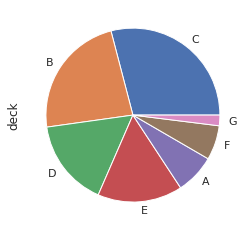

In [153]:
titanic_objects.deck.value_counts().plot(kind='pie')

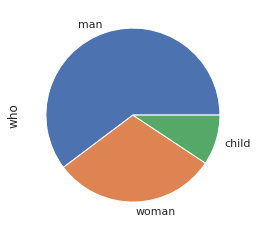

In [154]:
titanic_objects.who.value_counts().plot(kind='pie')

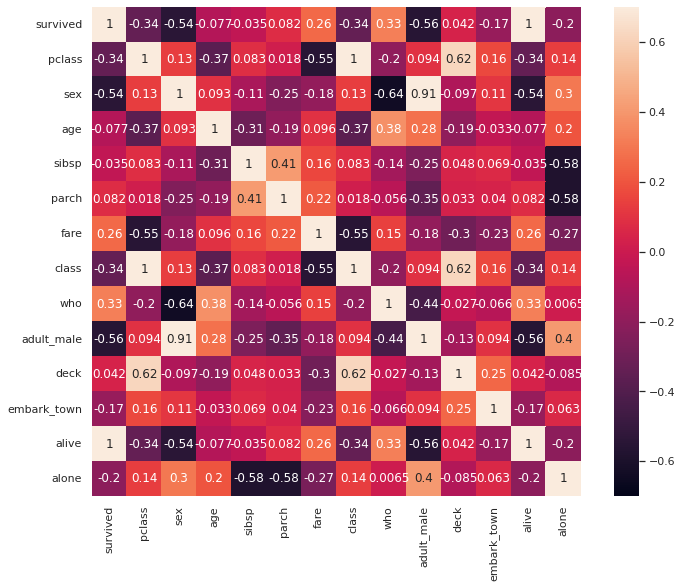

In [155]:
#correlation matrix
corrmat = titanic.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.7,vmin=-0.7, square=True,annot=True);

'Theres 7 people who did not survived between 65-80'

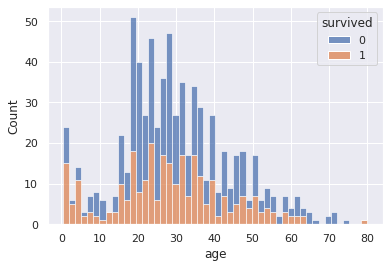

In [156]:

ax=sns.histplot(data=titanic,x=titanic.age,hue=titanic.survived,multiple='stack',bins=50)
num = len(titanic[titanic["age"]>65][titanic["age"]<80])
f"Theres {num} people who did not survived between 65-80"


In [157]:
age_ranged_titanic=titanic.groupby(pd.cut(titanic["age"], np.arange(0, 90, 10))).sum()
age_ranged_titanic["Survival Rate [%]"] = age_ranged_titanic.survived*100/len(titanic)
age_ranged_titanic["Alone [%]"] = age_ranged_titanic.alone*100/len(titanic)
print("Results by age range:")
print(age_ranged_titanic[["survived","Survival Rate [%]","alone","Alone [%]"]])



Results by age range:
          survived  Survival Rate [%]  alone  Alone [%]
age                                                    
(0, 10]         38           4.264871    1.0   0.112233
(10, 20]        44           4.938272   65.0   7.295174
(20, 30]        84           9.427609  157.0  17.620651
(30, 40]        69           7.744108   92.0  10.325477
(40, 50]        33           3.703704   46.0   5.162738
(50, 60]        17           1.907969   25.0   2.805836
(60, 70]         4           0.448934   13.0   1.459035
(70, 80]         1           0.112233    5.0   0.561167


### Impressions:
1. Most people on board were men
2. Most people on board were "third class"
3. Most people on board were from Southampton
4. Zero Survivals aged 65-80
5. Highest survival rate is for ages 20-30 (~9%)

## Handling Missing Data / Duplicates

In [158]:
total = titanic.isnull().sum().sort_values(ascending=False) 
percent = (100*titanic.isnull().sum()/titanic.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['missing vals [Total]', 'missing vals [Percent]'])
missing_data.head(20)


,missing vals [Total],missing vals [Percent]
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
sibsp,0,0.000000
parch,0,0.000000
fare,0,0.000000


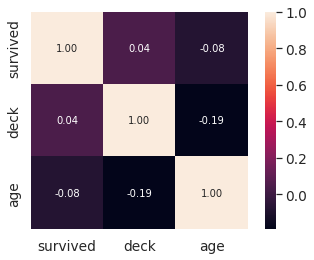

In [159]:
# check missing vals corr. to "survived"
corrmat = titanic[["survived","deck","age"]].corr()
sns.set(font_scale=1.25)
hm = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.show()

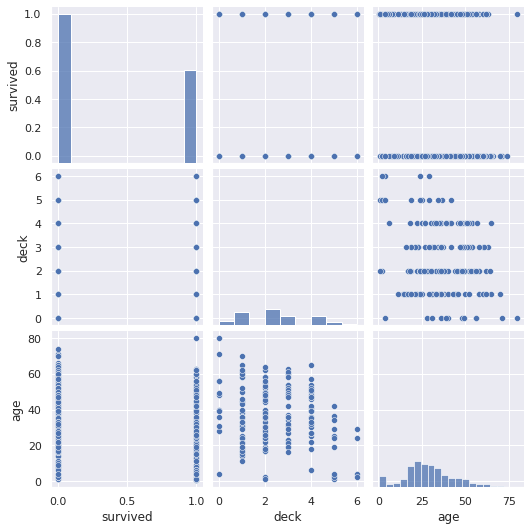

In [160]:
#Pairplot
sns.set()
#cols = ['survived', 'pclass', 'sex', 'sibsp', 'fare', 'adult_male', 'deck','embark_town','alone']
cols = ['survived', 'deck','age']
sns.pairplot(titanic[cols], size = 2.5)
plt.show()

### impressions: 


*   it seems like "deck" and "age" info has many missing values. I don't recognize significant correlation to "survived".
*   "Deck" showing no trend nor pattern relative to "survivred". 
*  "Age" has a significant gap between 65-80 for survived = 1 (i.e. every person between that age that was on board - did not survive). It could be a predictive piece of data but unfortunately "Age" has no correlation to any other variable so I can't see how to compensate for it.

⏩ Therefoe, I decide to ignore these variables and remove them.


In [161]:
# removing "age" , "deck"
x = titanic.pop("age")
x = titanic.pop("deck")


In [162]:
# Removing 2 missing vals of embark_town
titanic = titanic.drop(titanic.loc[titanic['embark_town'].isnull()].index)
titanic.isnull().sum().max() #just checking that there's no missing data missing...

0

In [163]:
# it also seems that "embark_town" is equiv to embarked. let's check:
# "array(['Cherbourg', 'Queenstown', 'Southampton', nan], dtype=object)"
mapping_dict = {"C": 0.0, "Q": 1.0, 'S':2.0 }
titanic["embarked"].replace(mapping_dict,inplace=True)
col_delta = titanic["embarked"] - titanic["embark_town"]
col_delta.sum() # checking that indeed embarked == embark_town

0.0

In [164]:
# Removing embarked:
x = titanic.pop("embarked")

# Also, "class" == "pclass"
x = titanic.pop("class")

# Also, alive vould not be a predictive var for survival chance...
x = titanic.pop("alive")

titanic.head()

,survived,pclass,sex,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,1.0,1,0,7.2500,1.0,1.0,2.0,0.0
1,1,1,0.0,1,0,71.2833,2.0,0.0,0.0,0.0
2,1,3,0.0,0,0,7.9250,2.0,0.0,2.0,1.0
3,1,1,0.0,1,0,53.1000,2.0,0.0,2.0,0.0
4,0,3,1.0,0,0,8.0500,1.0,1.0,2.0,1.0


##  Splitting Data into Training and Test sets


In [165]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(titanic, test_size=0.1,random_state=20)

print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(train_data), len(test_data)))

The size of training data is: 800 
The size of testing data is: 89


## Normalization of Data

Normalization is a scaling techniques that transform the numerical feature to the range of values between 0 and 1. 

Here is a formula that is followed when normalizing the data. $Xmin$ is the minimum value of feature X, and $Xmax$ is the maximum value of X. 

$$
Xnorm = \frac {X-Xmin} {Xmax-Xmin}
$$

When you have features that have different ranges of values, normalizing these features can be a good practice. 

Take an example. If you have two features that have different ranges (say one feature from 1-100, other vary from 5-300), you will to scale them so they have the same range of values. 

More specifically, normalization is a preferrable scaling technique when the data at hand has not a normal or gaussian distribution. If the data's distribution is gaussian, standardization is a preferrable scaling technique. If you don't know the distribution of the data, still, normalization is a good choice at first. 

With that said, when the ML algorithm of choice is either neural network or K-Nearest Neighbors(KNN), normalization is a good choice for these type of algorithms because they don't make any assumption of the input data. 

Most popular ML frameworks provide functions to normalize the numerical data. 


In [166]:



titanic_Y_train = train_data.pop('survived')
titanic_feats_train = train_data.copy()

titanic_Y_test = test_data.pop('survived')
titanic_feats_test = test_data.copy()

scaler = MinMaxScaler()
num_scaled_train = scaler.fit_transform(titanic_feats_train)
num_scaled_test = scaler.fit_transform(titanic_feats_test)



In [167]:
# Convert scaled np array to scaled df
titanic_scaled_df = pd.DataFrame(num_scaled_train, columns=titanic_feats_train.columns)
titanic_scaled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pclass,800.0,0.644375,0.421682,0.0,0.000000,1.000000,1.000000,1.0
sex,800.0,0.653750,0.476072,0.0,0.000000,1.000000,1.000000,1.0
sibsp,800.0,0.065469,0.138828,0.0,0.000000,0.000000,0.125000,1.0
parch,800.0,0.074000,0.155416,0.0,0.000000,0.000000,0.000000,1.0
fare,800.0,0.064722,0.099939,0.0,0.015469,0.028261,0.061264,1.0
who,800.0,0.604375,0.293941,0.0,0.500000,0.500000,1.000000,1.0
adult_male,800.0,0.611250,0.487771,0.0,0.000000,1.000000,1.000000,1.0
embark_town,800.0,0.760000,0.401686,0.0,0.500000,1.000000,1.000000,1.0
alone,800.0,0.598750,0.490458,0.0,0.000000,1.000000,1.000000,1.0


# 2.0 ML models

## LogisticRegression model 


In [168]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(num_scaled_train, titanic_Y_train)
log_model.score(num_scaled_train, titanic_Y_train)

0.815

## SGDClassifier Model


In [169]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(num_scaled_train, titanic_Y_train)
sgd_clf.score(num_scaled_train, titanic_Y_train)

0.80625

## DecisionTreeClassifier Model



In [170]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(num_scaled_train, titanic_Y_train)
tree_clf.score(num_scaled_train, titanic_Y_train)

0.9275

# 3.0 Model Evaluation

Evaluating classification models is not as simple as for regression models. When you have skewed dataset or imbalances, you can get a high accuracy and you can think the model did well when in fact it didn't.

In this part, we are going to learn how to evaluate classification models. But first, let's evaluate the model with cross validation.

Here is an idea behind cross validation: We want to divide the training set into different training and validation subsets so that we can iteratively train and validate the models on those subsets.

Take an example, if we divide our training data into 10 subsets (commonly known as folds), each subset will take 10% of the whole data. As a result of using cross validation, we will train 10 different models where each model is trained on 9 different subsets and validated on 1 subset or fold, iteratively. By the end of such process, we will have 10 different model scores.

Let's run cross validation on the logistic regression model and SGD classifier.

In [171]:
# Let's hide warnings returned by cross validation.

import warnings
warnings.filterwarnings('ignore')

In [172]:
from sklearn.model_selection import cross_val_score

# cv is the number of subsets/folds 

log_scores = cross_val_score(log_model, num_scaled_train, titanic_Y_train,
                         cv=10) #10 folds

In [173]:
log_scores

array([0.75  , 0.8375, 0.8375, 0.7375, 0.7875, 0.8   , 0.8875, 0.775 ,
       0.8375, 0.8625])

In [174]:
log_scores.mean()

0.81125

In [175]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree_clf, num_scaled_train, titanic_Y_train,
                         cv=10)

In [176]:
tree_scores

array([0.775 , 0.8   , 0.825 , 0.7875, 0.8375, 0.8125, 0.875 , 0.8125,
       0.8   , 0.8375])

In [177]:
tree_scores.mean()

0.8162499999999999

In [178]:
from sklearn.tree import plot_tree

# plt.figure(figsize=(300,300))
# plot_tree(tree_clf, feature_names=titanic_scaled_df.columns, class_names=['N','P']);

## make prediction on Test array

In [179]:
from sklearn.metrics import accuracy_score
# make predictions
ytest = titanic_Y_test
yhat = tree_clf.predict(num_scaled_test)
# evaluate predictions
acc = accuracy_score(ytest, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.888


In [180]:
from sklearn.metrics import classification_report

def class_report(input_data,model,labels):
    """
    Take the input data, model and labels and return confusion matrix
    
    """
    
    preds = model.predict(input_data)
    report = classification_report(labels,preds)
    report = print(report)
    
    return report

In [181]:
class_report(num_scaled_train, tree_clf, titanic_Y_train)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       493
           1       0.96      0.85      0.90       307

    accuracy                           0.93       800
   macro avg       0.93      0.91      0.92       800
weighted avg       0.93      0.93      0.93       800



#4.0 Improve the tree

In [182]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [183]:
# Let's hide warnings returned by grid search

import warnings
warnings.filterwarnings('ignore')

In [184]:
from sklearn.model_selection import GridSearchCV

params_grid = {'max_leaf_nodes': list(range(0, 10)), 
               'min_samples_split': [0,1,2, 3, 4], 
               'min_samples_leaf': [0,1,2, 3, 4], 
               'max_depth':[0,1,2,3,4,5],
               'max_features':[0,1,2,3,4,5],
              'max_leaf_nodes':[0,1,2,3,4,5]}

#refit is true by default. The best estimator is trained on the whole dataset 

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'), params_grid, verbose=1, cv=3, refit=True)

grid_search.fit(num_scaled_train, titanic_Y_train)


Fitting 3 folds for each of 5400 candidates, totalling 16200 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5],
                         'max_features': [0, 1, 2, 3, 4, 5],
                         'max_leaf_nodes': [0, 1, 2, 3, 4, 5],
                         'min_samples_leaf': [0, 1, 2, 3, 4],
                         'min_samples_split': [0, 1, 2, 3, 4]},
             verbose=1)

In [185]:
grid_search.best_params_

{'max_depth': 2,
 'max_features': 5,
 'max_leaf_nodes': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [186]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_features=5,
                       max_leaf_nodes=3, random_state=42)

In [187]:
tree_best = grid_search.best_estimator_

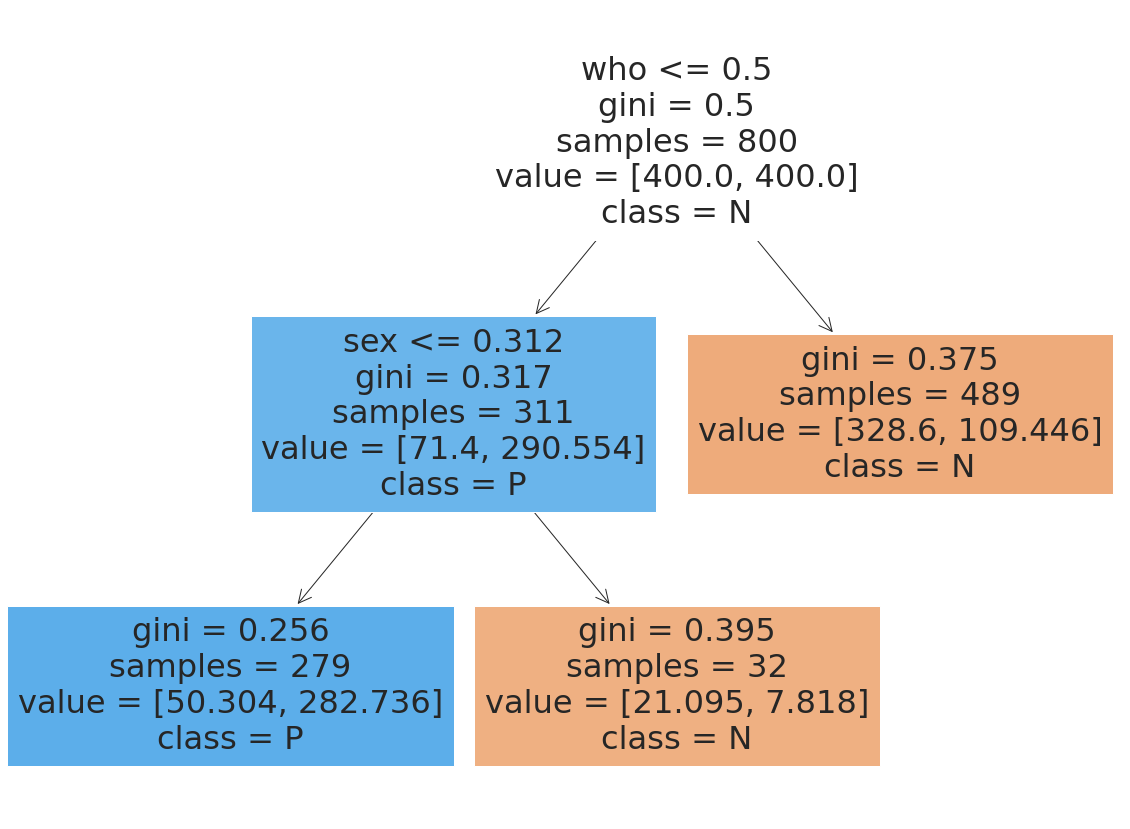

In [188]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(tree_best, feature_names=titanic.columns, class_names=['N','P'],filled=True);

In [189]:
tree_best_scores = cross_val_score(tree_best, num_scaled_train, titanic_Y_train,
                         cv=10)
print(tree_best_scores)

[0.7625 0.8375 0.7875 0.7375 0.7875 0.775  0.8875 0.8    0.8375 0.85  ]


In [190]:
tree_best_scores.mean()

0.80625

In [191]:
class_report(num_scaled_train, tree_best, titanic_Y_train)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       493
           1       0.78      0.71      0.74       307

    accuracy                           0.81       800
   macro avg       0.80      0.79      0.80       800
weighted avg       0.81      0.81      0.81       800



# 5.0 End Remarks ☝

At the end of this work we can conclude that estimating survival on the Titanic with a decent probability of ~80% could be reduced to 3 major questions:


1.   Were you a woman? - if Yes, great! you probably survived.
2.   Were you a child? - if Yes - were you a female? - if Yes, great! you probably survived.
3. If you are an adult male on the Titanic you probably were unlucky.

